## Visualizing linear regression

Using matplotlib and ipython's interactive sliders to make a tool for visualizing linear regression and the mean squared error  
  
n.b. Interactive functionality is commented out so that plots show on github (end of cell 3)

In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from random import random
from ipywidgets import interact

Create some artificial data points with a linear relation (and some noise)

In [2]:
xs = list(range(30))
ys = [x*0.6 + (5*random() + 3) for x in xs]

Draw a scatter plot of the points, along with a fit line and the residuals as squares:

Play with the sliders to minimize: 

              * the total shaded area = 61.615081538142654

              * the average square area (mean square error) = 2.0538360512714218


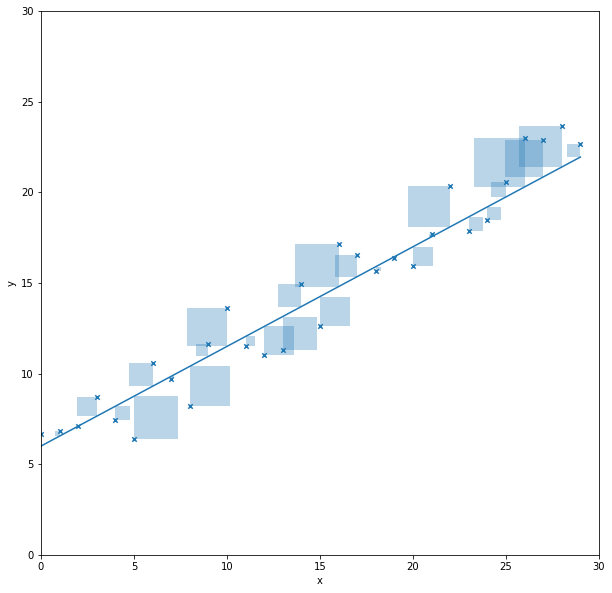

In [3]:
def draw_fit(w,b):
    
    fig,ax = plt.subplots(figsize=(10, 10))
    plt.scatter(xs, ys, marker='x', s=20)   #Draw scatter plot of points
    predictions = [(x*w)+b for x in xs]
    plt.plot(xs, predictions)    #Draw line y=wx*b
    plt.xlim(0,30)
    plt.ylim(0,30)
    plt.xlabel('x')
    plt.ylabel('y')
    
    residuals = [y - p for y, p in zip(ys, predictions)] #Plot squares from each point with side length = residual
    for i, (x,y) in enumerate(zip(xs,ys)):
        err = residuals[i]
        rect = Rectangle((x-err,y-err), err, err, angle=0.0, alpha = 0.3, linewidth = 10.) #Always draw square towards fit line
        ax.add_patch(rect)
    
    squares = [r*r for r in residuals] #Calculate total sum of squares error
    print(f'''Play with the sliders to minimize: \n
              * the total shaded area = {sum(squares)}\n
              * the average square area (mean square error) = {sum(squares)/len(squares)}''')  #MSE

#Interact does not work with github so call plot for one set of values:
draw_fit(w=0.55, b=6)
#interact(draw_fit, w=(-1,2,0.001), b=(-2,15, 0.001));

Now calculating optimal w and b: 

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
lm = LinearRegression()  

X_train = np.array(xs).reshape(-1, 1)
y_train = np.array(ys).reshape(-1, 1)

lm.fit(X_train,y_train)  

predictions = lm.predict(X_train)

print('Best optimal value for w is {:.3f}'.format(lm.coef_[0][0]))
print('Best optimal value for b is {:.3f}'.format(lm.intercept_[0]))

from sklearn import metrics   
print('\nThe minimum average area (mean squared error) is {:.3f} '.format(metrics.mean_squared_error(y_train, predictions)))

Best optimal value for w is 0.601
Best optimal value for b is 5.529

The minimum average area (mean squared error) is 1.794 
